![EvalML Logo](images/evalml_logo.png)


# What is EvalML?
EvalML is an AutoML library that builds, optimizes, and evalutes machine learning pipelines using domain-specific objective functions.


Combined with [Featuretools](https://featuretools.featurelabs.com) and [Compose](https://compose.featurelabs.com), EvalML can be used to create end-to-end machine learning solutions for classification and regression problems. 


# Quick Start

In [ ]:
import evalml

## Load Data

First, we load in the features and outcomes we want to use to train our model

In [ ]:
X, y = evalml.demos.load_breast_cancer()

## Configure search

EvalML has many options to configure the pipeline search. At the minimum, we need to define an objective function. For simplicity, we will use the F1 score in this example. However, the real power of EvalML is in using domain-specific [objective functions](objectives/overview.html) or [building your own](objectives/custom_objectives.html).

In [ ]:
clf = evalml.AutoClassifier(objective="f1",
                            max_pipelines=5)

In order to validate the results of the pipeline creation and optimization process, we will save some of our data as a holdout set

In [ ]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, test_size=.2)

When we call `.fit()`, the search for the best pipeline will begin. 

In [ ]:
clf.fit(X_train, y_train)

## See Pipeline Rankings

After the search is finished we can view all of the pipelines searched, ranked by score. Internally, EvalML performs [cross validation](automl/guardrails.html) to score the pipelines. If it notices a high variance across cross validation folds, it will warn you.

In [ ]:
clf.rankings

## Describe pipeline

If we are interested in see more details about the pipeline, we can describe it using the `id` from the rankings table:

In [ ]:
clf.describe_pipeline(3)

## Select Best pipeline
We can now select best pipeline and score it on our holdout data:

In [ ]:
pipeline = clf.best_pipeline
pipeline.score(X_holdout, y_holdout)

We can also visualize the structure of our pipeline:

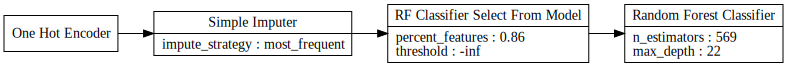

In [9]:
pipeline.visualize()

# Getting Started
[What is EvalML](self)

[Install](install)

# Objective functions

[Overview](objectives/overview)

[Fraud Prediction](demos/fraud)

[Lead Scoring](demos/lead_scoring)

[Defining Custom Objectives](objectives/custom_objectives)

# Automated Machine Learning

[Setting up pipeline search](automl/pipeline_search)

[Exploring search results](automl/search_results)

[Avoiding Overfitting](automl/guardrails)

[Regression Example](automl/regression_example)

# Resources
[Changelog](changelog)

[Roadmap](roadmap)

[API Reference](api_reference)